# Data Analysis Project
### Fall 2023
## Analyzing Insurance Auto Claims

<br>
<br>
<p align="center">
<img 
  src="./files/car_accident.png" 
  alt="Car Accident" 
  width="800"
  height="650"
/>
</p>

<br>

## Introduction
This semester we will be working with a dataset of auto claims filed by customers of an automobile insurance company located in the southwest and western regions of the United States.

Insurance companies depend on accurate pricing estimates to maintain profitability. Auto policies must be priced so that the insurance company makes a profit in the long run, given the costs of their customers' payouts for accident repairs, total loss car replacements, medical fees, and legal fees.

The executives at this insurance company have noticed declining profitability over the last several years and have hired you as a data science consultant to evaluate their claims data and make recommendations on pricing, customer behavior, and car insurance policy adjustments.

The objective of this project is to perform an exploratory data analysis on the `claims_df` dataset and produce an executive summary of your key insights and recommendations to the executive team at the insurance company.

Before you begin, take a moment to read through the following insurance company terms to familiarize yourself with the industry: [Auto Insurance Terms](https://www.iii.org/article/auto-insurance-jargon-buster "Auto Insurance Terms")

## Auto Claims Data

The `claims_df` data frame is loaded below and consists of 6,249 auto claims submitted by customers of the insurance company. The rows in this data frame represent a single claim with all of the associated features that are displayed in the table below.

### Data Definitions

| Variable                	| Definition                                                  	| Data Type 	|
|:------------------------- |:------------------------------------------------------------- |:------------- |
| customer_id             	| Customer identifier                                         	| Character 	|
| customer_state          	| State of residence                                          	| Factor    	|
| highest_education       	| Highest level of education                                  	| Factor    	|
| employment_status       	| Employment status at time of claim                          	| Factor    	|
| gender                  	| Gender                                                      	| Factor    	|
| income                  	| Income (US Dollars)                                         	| Numeric   	|
| residence_type          	| Customer residence type                                     	| Factor    	|
| marital_status          	| Marital status                                              	| Factor    	|
| sales_channel           	| Customer acquisition method                                 	| Factor    	|
| coverage                	| Auto policy tier                                            	| Factor    	|
| policy                  	| Auto policy type                                            	| Factor    	|
| vehicle_class           	| Vehicle type                                                	| Factor    	|
| vehicle_size            	| Vehicle size                                                	| Factor    	|
| monthly_premium         	| Customer monthly premium                                    	| Numeric   	|
| months_policy_active    	| Number of months policy has been active                     	| Numeric   	|
| months_since_last_claim 	| Number of months since last claim                           	| Numeric   	|
| current_claim_amount    	| Current claim amount                                        	| Numeric   	|
| total_claims            	| Total number of claims in customer history                  	| Numeric   	|
| total_claims_amount     	| Total amount of all claims in customer history              	| Numeric   	|
| customer_lifetime_value 	| Customer lifetime value (total revenue - total claims cost) 	| Numeric   	|

In [7]:
# Load data
library(tidyverse)

claims_df <- 
  readRDS(url('https://gmubusinessanalytics.netlify.app/data/claims_df.rds'))

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ forcats   1.0.0     ✔ readr     2.1.4
✔ ggplot2   3.4.4     ✔ stringr   1.5.1
✔ lubridate 1.9.3     ✔ tibble    3.2.1
✔ purrr     1.0.2     ✔ tidyr     1.3.0
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


In [4]:
# View data
claims_df

customer_id,customer_state,highest_education,employment_status,gender,income,residence_type,marital_status,sales_channel,coverage,policy,vehicle_class,vehicle_size,monthly_premium,months_policy_active,months_since_last_claim,current_claim_amount,total_claims,total_claims_amount,customer_lifetime_value
<chr>,<fct>,<fct>,<fct>,<fct>,<dbl>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
AA11235,Nevada,Bachelor,Medical Leave,Female,11167,Suburban,Married,Branch,Basic,Personal,Two-Door Car,Midsize,73,25,0,1383,1,1383,442
AA16582,Washington,Bachelor,Medical Leave,Male,14072,Suburban,Divorced,Agent,Basic,Personal,Four-Door Car,Midsize,71,27,13,1379,2,1992,-75
AA34092,California,Associate,Employed,Male,33635,Suburban,Married,Web,Extended,Personal,Luxury SUV,Midsize,240,32,1,2633,2,3671,4009
AA56476,Arizona,High School,Employed,Female,74454,Suburban,Single,Call Center,Basic,Corporate,Four-Door Car,Midsize,71,39,25,906,2,1541,1228
AA69265,Nevada,Bachelor,Employed,Female,60817,Suburban,Single,Web,Premium,Personal,Four-Door Car,Midsize,103,21,3,1095,2,1760,403
AA71604,Arizona,Master,Employed,Female,87560,Suburban,Married,Web,Extended,Personal,Two-Door Car,Midsize,98,17,4,1136,2,1828,-162
AA93585,California,Associate,Employed,Male,97024,Urban,Married,Branch,Premium,Personal,SUV,Midsize,177,33,0,1712,1,1712,4129
AB21519,California,Associate,Employed,Female,93272,Urban,Married,Branch,Extended,Personal,Four-Door Car,Midsize,95,26,3,1702,2,2585,-115
AB23825,California,Associate,Employed,Male,21509,Suburban,Single,Agent,Extended,Personal,Two-Door Car,Midsize,81,48,24,2058,2,3033,855


In [8]:
write_csv(claims_df, "auto_claims.csv")

## Exploratory Data Analysis (80 Points)

Executives at this company have hired you as a data science consultant to evaluate their claims data and make recommendations on pricing, customer behavior, and car insurance policy adjustments.

You must think of **at least 8 relevant questions** that will provide evidence for your recommendations.

The goal of your analysis should be discovering which variables drive the differences between customers with large lifetime values and customers who cost the company more than they provide in revenue through monthly premiums.

Some of the many questions you can explore include:

- Are there types of customers, based on their policy or demographics, that are highly profitable?
- Do certain policies have a lower number of claims, leading to large profits?
- Are there "problem customers" which have a large number of claims?

You must answer each question and provide supporting data summaries with either a summary data frame (using `dplyr`/`tidyr`) or a plot (using `ggplot`) or both.

In total, you must have a minimum of 5 plots and 4 summary data frames for the exploratory data analysis section. Among the plots you produce, you must have at least 4 different types (ex. box plot, bar chart,
histogram, heat map, etc...)

Each question must be answered with **supporting evidence** from your tables and plots.

See the example question below.

### Question

**Is there a relationship between employees leaving the company and their current salary?**

**Answer**: Yes, the data indicates that employees who leave the company tend to have lower salaries when compared to employees who do not. Among the 237 employees that left the company, the average salary was \$76,625. This is over \$20,000 less than the average salary of employees who did not leave the company.

Among the employees *who did not leave the company*, only 10% have a salary that is less than or equal to \$60,000. When looking at employees who did leave the company, this increases to 34%.

### Supporting Table and Visualization

Note - the sample code and output below is an image, not code cells

<p align="center">
<img 
  src="https://gmubusinessanalytics.netlify.app/images/sample_table.jpg"
  width="650"
  height="auto"
/>
</p>

<br>
<br>
<br>

<p align="center">
<img 
  src="https://gmubusinessanalytics.netlify.app/images/sample_plot.jpg"
  width="650"
  height="auto"
/>
</p>


## Question 1


**Question**:Which customer demographics have the highest customer lifetime value (CLV)?


**Answer**:Based on the examination of customer demographics and their related Customer Lifetime Value (CLV), it's clear that certain demographic groups tend to show higher CLV compared to others. Specifically, female customers, customers with a Master's degree, single customers, and disabled customers demonstrate higher CLV in their respective demographic categories.This implies that gender, education level, marital status, and employment status play significant roles in influencing CLV within the customer base.

## Supporting Analysis

In [6]:
# This code adjusts the figure output size in the notebook
options(repr.plot.width=11, repr.plot.height=8)

[1] "Summary of Average CLV by Gender:"


gender,avg_clv
<fct>,<dbl>
Female,1148.0390
Male,688.3643


[1] "Summary of Average CLV by Highest Education:"


highest_education,avg_clv
<fct>,<dbl>
High School,965.5064
Associate,883.2572
Bachelor,868.3100
Master,1154.1090
Doctoral,777.6548


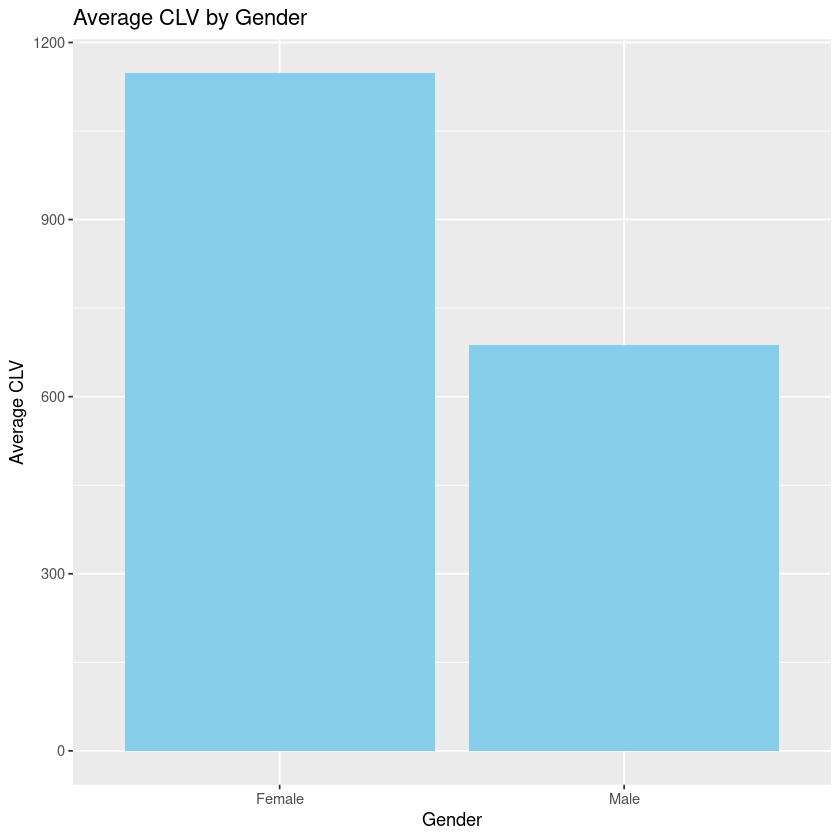

[1] "Summary of Average CLV by Marital Status:"


marital_status,avg_clv
<fct>,<dbl>
Single,947.1052
Married,915.0200
Divorced,925.4182


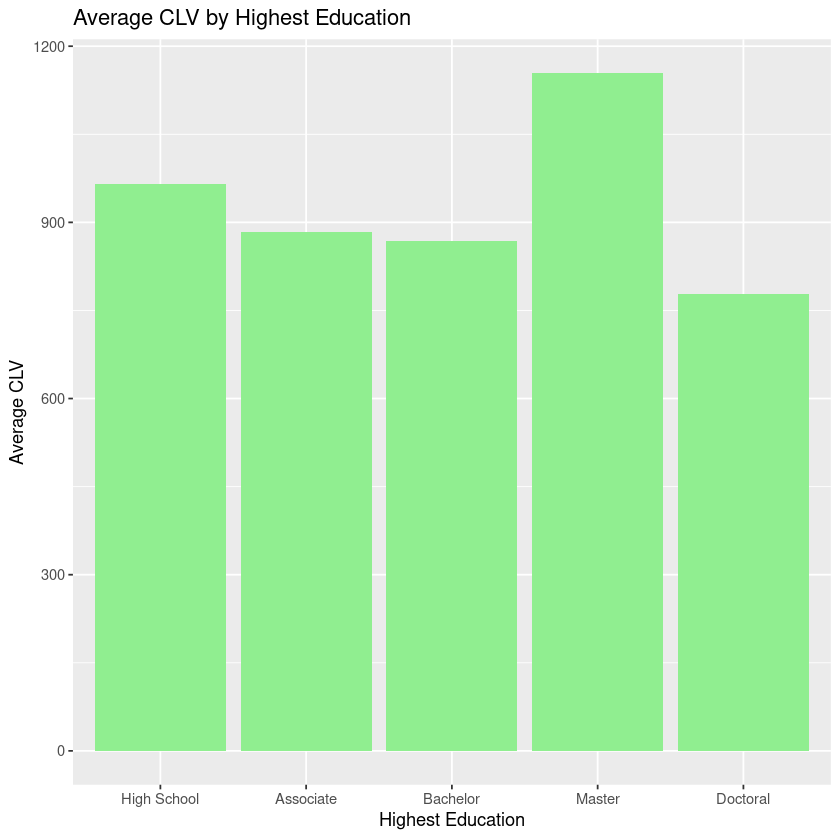

[1] "Summary of Average CLV by Employment Status:"


employment_status,avg_clv
<fct>,<dbl>
Employed,898.5017
Medical Leave,966.1663
Disabled,1141.3342
Retired,982.0496


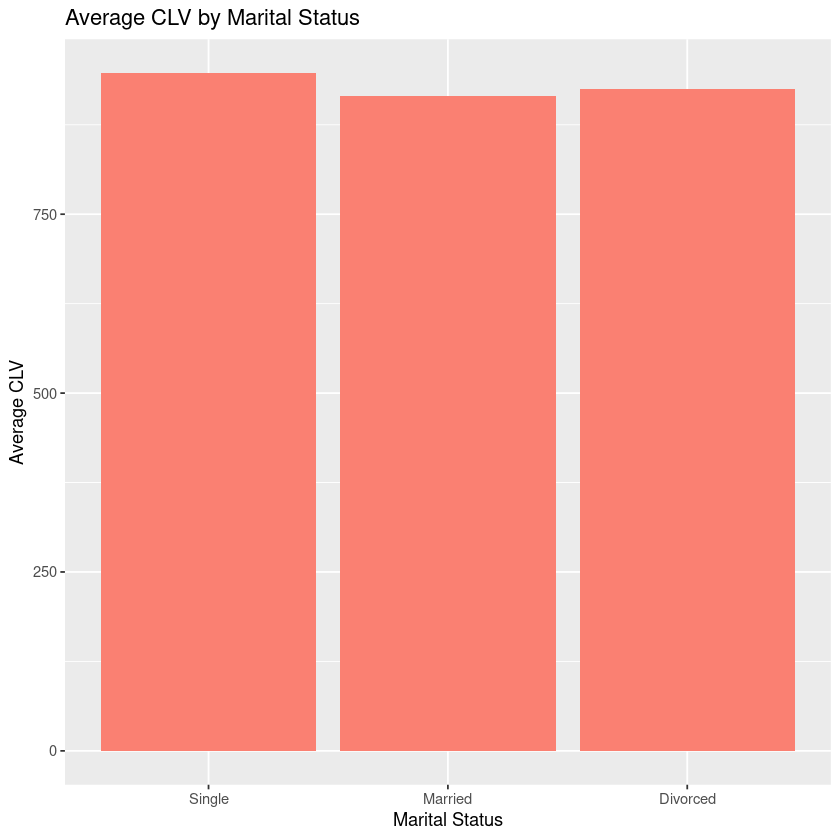

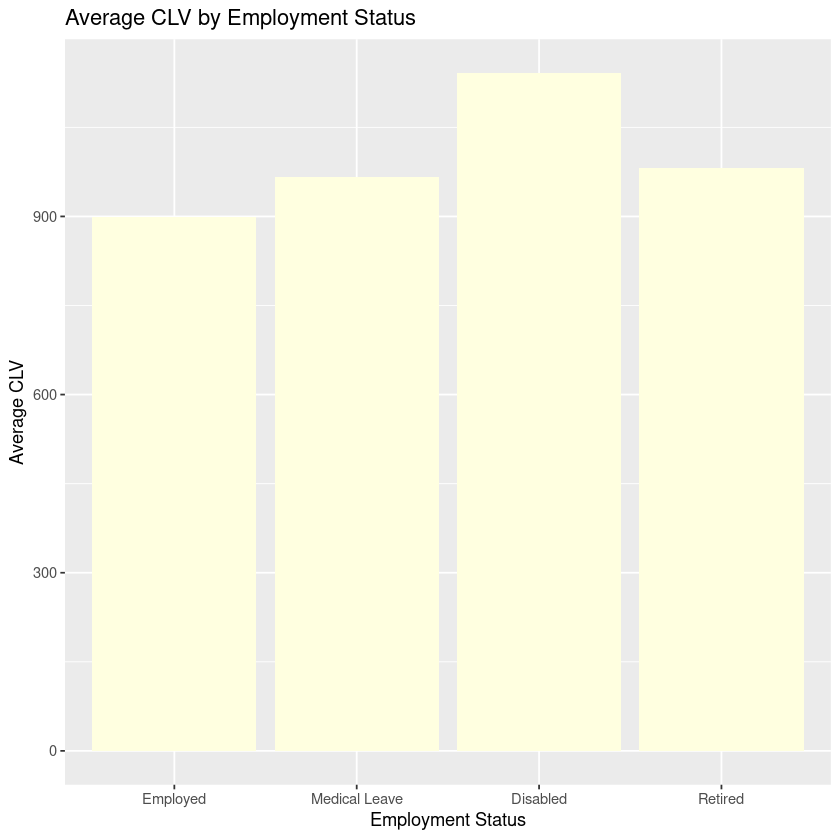

In [21]:
library(dplyr)
library(tidyr)
library(ggplot2)

# Summary data frame for average CLV by gender
clv_by_gender <- claims_df %>%
  group_by(gender) %>%
  summarise(avg_clv = mean(customer_lifetime_value, na.rm = TRUE))
print("Summary of Average CLV by Gender:")
clv_by_gender

# Plotting average CLV by gender
ggplot(clv_by_gender, aes(x = gender, y = avg_clv)) +
  geom_bar(stat = "identity", fill = "skyblue") +
  labs(title = "Average CLV by Gender",
       x = "Gender",
       y = "Average CLV")

# Summary data frame for average CLV by highest education
clv_by_education <- claims_df %>%
  group_by(highest_education) %>%
  summarise(avg_clv = mean(customer_lifetime_value, na.rm = TRUE))
print("Summary of Average CLV by Highest Education:")
clv_by_education

# Plotting average CLV by highest education
ggplot(clv_by_education, aes(x = highest_education, y = avg_clv)) +
  geom_bar(stat = "identity", fill = "lightgreen") +
  labs(title = "Average CLV by Highest Education",
       x = "Highest Education",
       y = "Average CLV")

# Summary data frame for average CLV by marital status
clv_by_marital <- claims_df %>%
  group_by(marital_status) %>%
  summarise(avg_clv = mean(customer_lifetime_value, na.rm = TRUE))
print("Summary of Average CLV by Marital Status:")
clv_by_marital

# Plotting average CLV by marital status
ggplot(clv_by_marital, aes(x = marital_status, y = avg_clv)) +
  geom_bar(stat = "identity", fill = "salmon") +
  labs(title = "Average CLV by Marital Status",
       x = "Marital Status",
       y = "Average CLV")

# Summary data frame for average CLV by employment status
clv_by_employment <- claims_df %>%
  group_by(employment_status) %>%
  summarise(avg_clv = mean(customer_lifetime_value, na.rm = TRUE))
print("Summary of Average CLV by Employment Status:")
clv_by_employment

# Plotting average CLV by employment status
ggplot(clv_by_employment, aes(x = employment_status, y = avg_clv)) +
  geom_bar(stat = "identity", fill = "lightyellow") +
  labs(title = "Average CLV by Employment Status",
       x = "Employment Status",
       y = "Average CLV")



## Question 2


**Question**:Do certain policies have a lower number of claims, leading to large profits?



**Answer**:Yes. According to the summary statistics, the "Personal" policy stands out with the highest total number of claims, totaling 11,131 claims. In contrast, the "Corporate" policy has significantly fewer claims, with a total of 3,175 claims, followed by the "Special" policy with 640 claims. 


## Supporting Analysis


[1] "Summary of Total Claims by Policy:"


policy,total_claims
<fct>,<dbl>
Personal,11131
Corporate,3175
Special,640


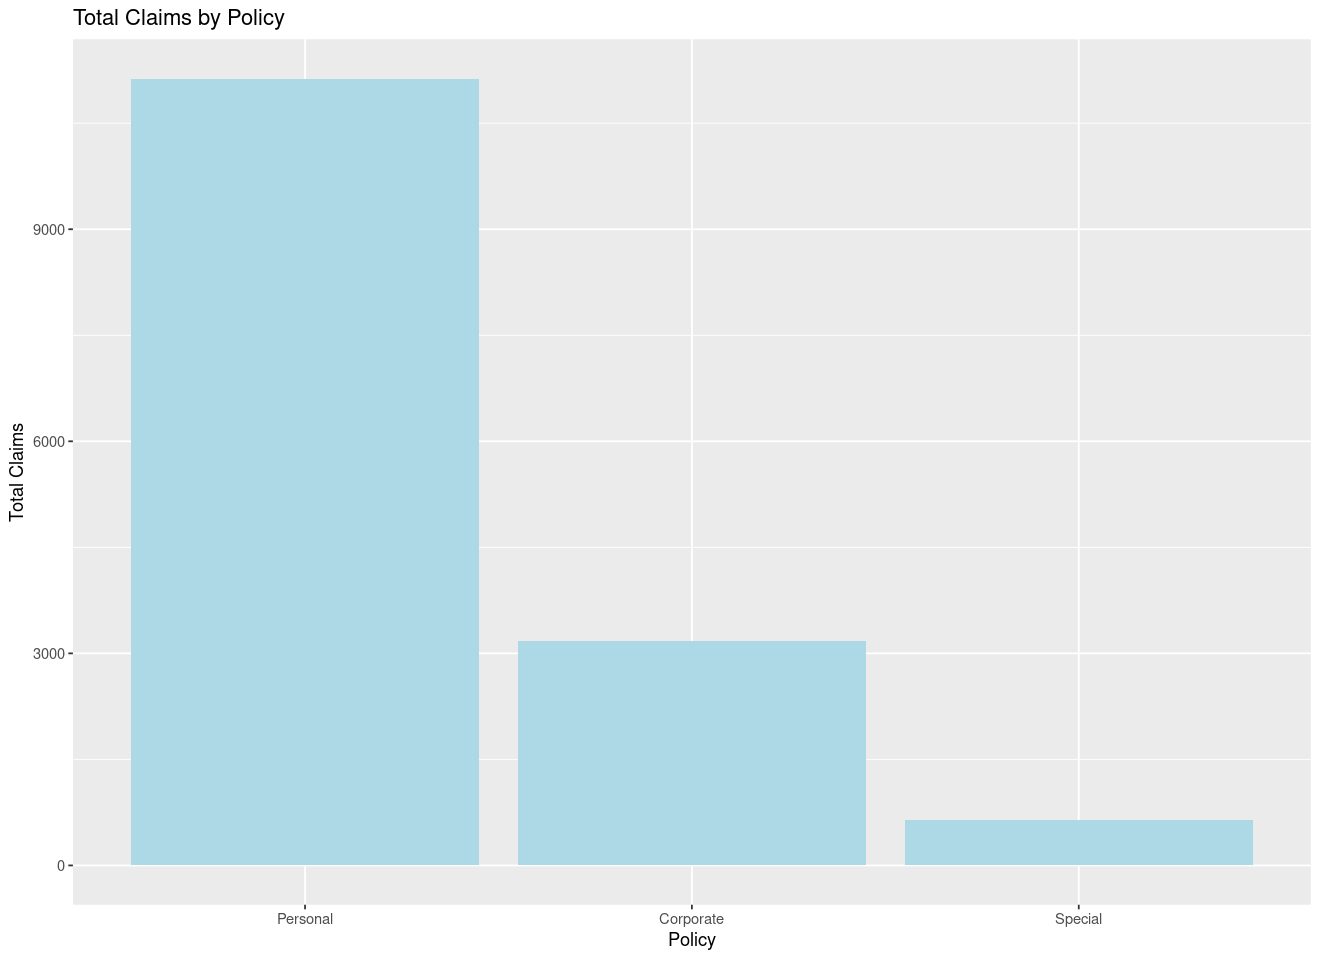

In [20]:
total_claims_by_policy <- claims_df %>%
  group_by(policy) %>%
  summarise(total_claims = sum(total_claims))

# View the summary data frame
print("Summary of Total Claims by Policy:")
total_claims_by_policy

# Plotting total claims by policy
ggplot(total_claims_by_policy, aes(x = policy, y = total_claims)) +
  geom_bar(stat = "identity", fill = "lightblue") +
  labs(title = "Total Claims by Policy",
       x = "Policy",
       y = "Total Claims")


## Question 3


**Question**:Are there "problem customers" which have a large number of claims?



**Answer**:The summary indicates that there are 35 customers identified as "problem customers" due to their notably high number of claims. These customers stand out from the rest of the customer base, as they have a significantly higher frequency of claims compared to others.


## Supporting Analysis


In [24]:
total_claims_per_customer <- claims_df %>%
  group_by(customer_id) %>%
  summarise(total_claims = sum(total_claims))

# View the summary data frame
print("Summary of Total Claims per Customer:")
total_claims_per_customer

# Identify "problem customers" with large number of claims
problem_customers <- total_claims_per_customer %>%
  filter(total_claims > mean(total_claims) + 2 * sd(total_claims))
print("Problem Customers with Large Number of Claims:")
problem_customers


[1] "Summary of Total Claims per Customer:"


customer_id,total_claims
<chr>,<dbl>
AA11235,1
AA16582,2
AA34092,2
AA56476,2
AA69265,2
AA71604,2
AA93585,1
AB21519,2
AB23825,2


[1] "Problem Customers with Large Number of Claims:"


customer_id,total_claims
<chr>,<dbl>
AG62140,4
AH53588,4
AI58313,4
AJ32539,4
AL46984,4
AM36670,4
AN57220,4
AO77635,4
AQ91207,4


## Question 4


**Question**:Are there specific vehicle classes associated with higher CLV?



**Answer**:The summary statistics says that certain vehicle classes have notably higher average customer lifetime values (CLVs) compared to others. Specifically, Sports Cars, Luxury Cars, and Luxury SUVs stand out with significantly higher average CLVs, indicating that customers owning these vehicle types tend to have higher CLVs. On the other hand, Two-Door Cars and Four-Door Cars have lower average CLVs in comparison.


## Supporting Analysis


[1] "Summary of Average CLV by Vehicle Class:"


vehicle_class,avg_clv
<fct>,<dbl>
Two-Door Car,269.3491
Four-Door Car,271.4142
Sports Car,2158.8299
SUV,1861.4968
Luxury Car,5669.7647
Luxury SUV,6381.5263


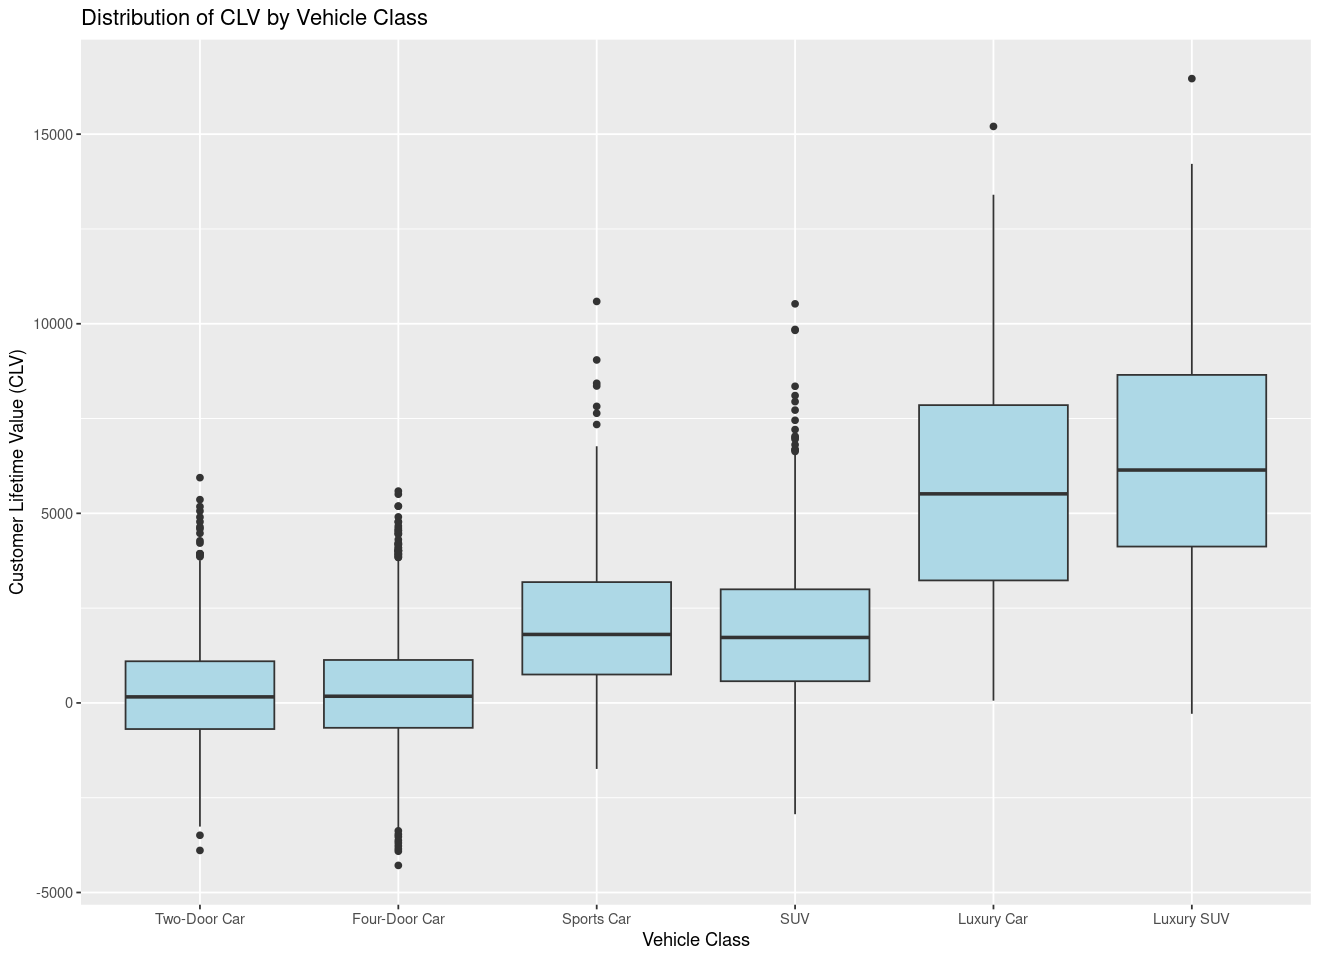

In [26]:
# Summary data frame for average CLV by vehicle class
avg_clv_by_vehicle_class <- claims_df %>%
  group_by(vehicle_class) %>%
  summarise(avg_clv = mean(customer_lifetime_value, na.rm = TRUE))

# View the summary data frame
print("Summary of Average CLV by Vehicle Class:")
avg_clv_by_vehicle_class

# Plotting box plot of CLV by vehicle class
ggplot(claims_df, aes(x = vehicle_class, y = customer_lifetime_value)) +
  geom_boxplot(fill = "lightblue") +
  labs(title = "Distribution of CLV by Vehicle Class",
       x = "Vehicle Class",
       y = "Customer Lifetime Value (CLV)")


## Question 5


**Question**:Do customers with longer active policy durations tend to have higher CLV?



**Answer**:Yes. Initially, CLV is negative for shorter policy durations (12 to 28 months), suggesting lower profitability. However, as policy duration increases, CLV steadily rises, peaking around 62 to 64 months with values exceeding $4000. Despite some fluctuations thereafter, CLV remains relatively high compared to earlier months. This highlights the importance of longer policy durations in maximizing customer lifetime value and overall profitability for the insurance company.








## Supporting Analysis


[1] "Summary of Average CLV by Months Policy Active:"


months_policy_active,avg_clv
<dbl>,<dbl>
12,-624.857143
13,-683.444444
14,-1078.242424
15,-1040.937500
16,-1147.000000
17,-1197.735849
18,-1089.666667
19,-663.487805
20,-749.076923


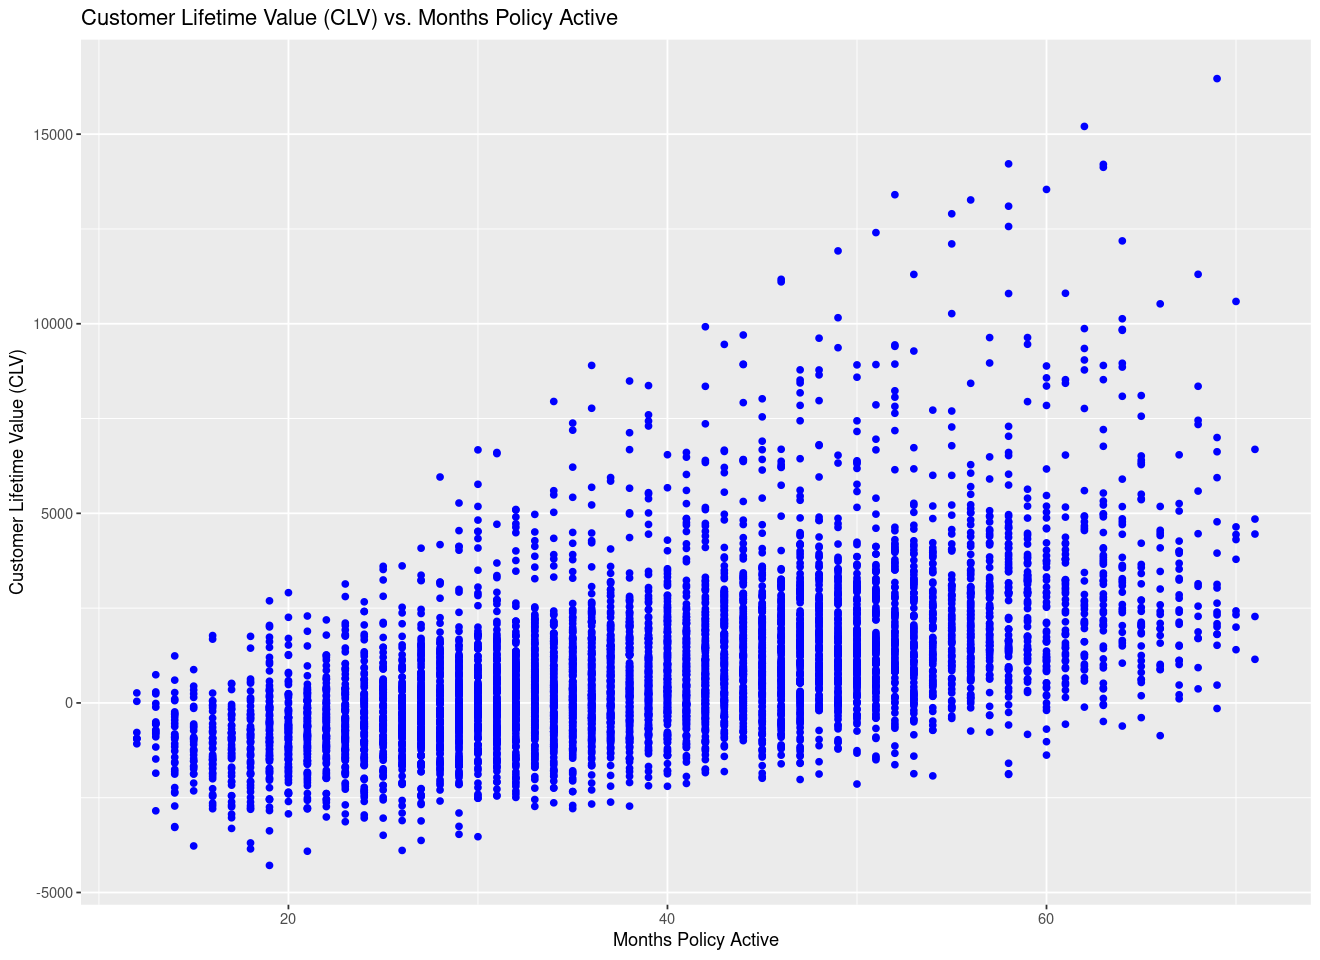

In [28]:
# Summary data frame for average CLV by months_policy_active
avg_clv_by_months_active <- claims_df %>%
  group_by(months_policy_active) %>%
  summarise(avg_clv = mean(customer_lifetime_value, na.rm = TRUE))

# View the summary data frame
print("Summary of Average CLV by Months Policy Active:")
avg_clv_by_months_active

# Plotting scatter plot of CLV against months_policy_active
ggplot(claims_df, aes(x = months_policy_active, y = customer_lifetime_value)) +
  geom_point(color = "blue") +
  labs(title = "Customer Lifetime Value (CLV) vs. Months Policy Active",
       x = "Months Policy Active",
       y = "Customer Lifetime Value (CLV)")


## Question 6


**Question**:Are there any noticeable differences in monthly premium amounts between high CLV customers and those costing the company more than they provide in revenue?




**Answer**:The summary statistics show that there is indeed a noticeable difference in the average monthly premiums between high CLV customers and negative CLV customers. High CLV customers have an average monthly premium of 103.79, while negative CLV customers have a lower average monthly premium of 75.58 in US dollars. This indicates that high CLV customers, who bring in more revenue than they cost, tend to pay higher monthly premiums compared to negative CLV customers, who cost the company more than they provide in revenue.


## Supporting Analysis


[1] "Summary of Average Monthly Premiums by Customer Group:"


customer_group,avg_monthly_premium
<chr>,<dbl>
High CLV,103.79366
Negative CLV,75.58318


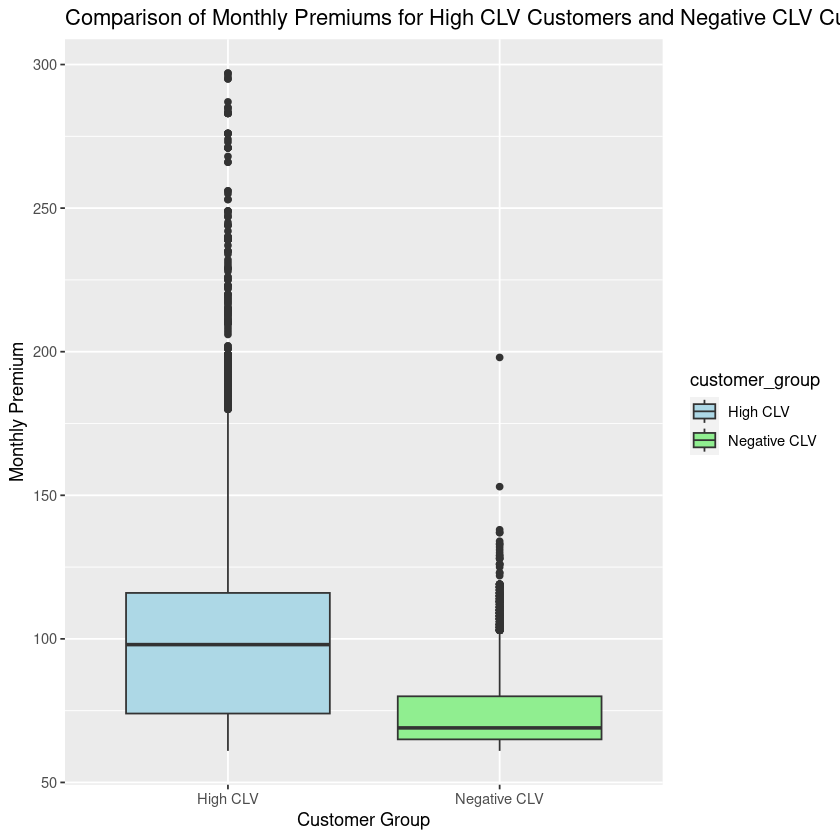

In [9]:
# Categorize customers into high CLV and negative CLV groups
claims_df <- claims_df %>%
  mutate(customer_group = ifelse(customer_lifetime_value > 0, "High CLV", "Negative CLV"))

# Summary data frame for average monthly premiums by customer group
avg_monthly_premiums <- claims_df %>%
  group_by(customer_group) %>%
  summarise(avg_monthly_premium = mean(monthly_premium, na.rm = TRUE))

# View the summary data frame
print("Summary of Average Monthly Premiums by Customer Group:")
avg_monthly_premiums

# Plotting box plot of monthly premiums for both groups
ggplot(claims_df, aes(x = customer_group, y = monthly_premium, fill = customer_group)) +
  geom_boxplot() +
  labs(title = "Comparison of Monthly Premiums for High CLV Customers and Negative CLV Customers",
       x = "Customer Group",
       y = "Monthly Premium") +
  scale_fill_manual(values = c("High CLV" = "lightblue", "Negative CLV" = "lightgreen"))




## Question 7


**Question**:Do customers with larger incomes tend to have higher CLV?



**Answer**:No. Customers in the "0-20k" income bracket have the highest average CLV of 1265.94, followed by those in the "40k-60k" bracket with an average CLV of 1057.85. The "20k-40k" income bracket has an average CLV of 940.71, while the "60k-80k" and "80k-100k" brackets have lower average CLVs of 784.12 and 665.59 in US dollars respectively. This suggests that customers with lower incomes tend to have higher average CLVs compared to those with higher incomes, as indicated by the descending trend in CLV across income brackets.


## Supporting Analysis


[1] "Summary of Average CLV by Income Bracket:"


income_bracket,avg_clv
<fct>,<dbl>
0-20k,1265.9434
20k-40k,940.7081
40k-60k,1057.8454
60k-80k,784.1203
80k-100k,665.5869


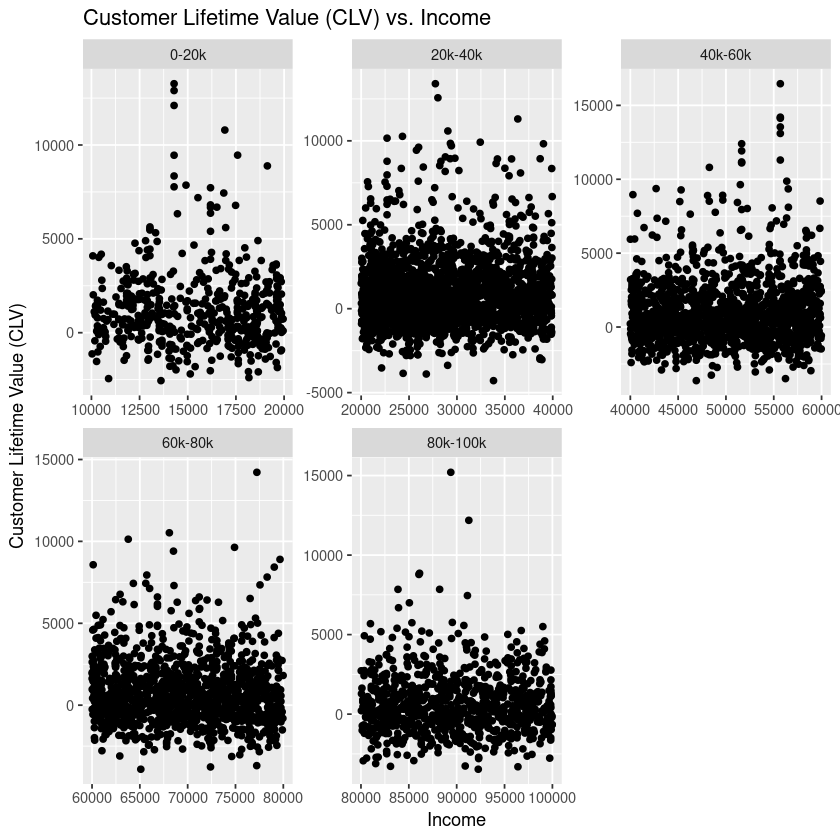

In [11]:
# Load necessary libraries
library(dplyr)
library(ggplot2)

# Assuming 'claims_df' is the name of your data frame

# Define income brackets (you can adjust the breaks as needed)
income_breaks <- c(0, 20000, 40000, 60000, 80000, 100000, Inf)

# Categorize customers into income brackets
claims_df <- claims_df %>%
  mutate(income_bracket = cut(income, breaks = income_breaks, labels = c("0-20k", "20k-40k", "40k-60k", "60k-80k", "80k-100k", "100k+")))

# Summary data frame for average CLV by income bracket
avg_clv_by_income <- claims_df %>%
  group_by(income_bracket) %>%
  summarise(avg_clv = mean(customer_lifetime_value, na.rm = TRUE))

# View the summary data frame
print("Summary of Average CLV by Income Bracket:")
avg_clv_by_income

# Plotting scatter plot of CLV against income
ggplot(claims_df, aes(x = income, y = customer_lifetime_value)) +
  geom_point() +
  facet_wrap(~ income_bracket, scales = "free") +
  labs(title = "Customer Lifetime Value (CLV) vs. Income",
       x = "Income",
       y = "Customer Lifetime Value (CLV)")


## Question 8


**Question**:What is the correlation between the number of claims and CLV?



**Answer**:The correlation coefficient between total claims and customer lifetime value (CLV) is approximately -0.286, indicating a moderate negative correlation between these two variables. This suggests that as the number of claims increases, the CLV tends to decrease, and vice versa. The negative sign indicates the direction of the relationship, while the magnitude of the coefficient (-0.286) signifies the strength of the correlation.


## Supporting Analysis


[1] "Correlation Coefficient between Total Claims and CLV:"
[1] -0.2863264


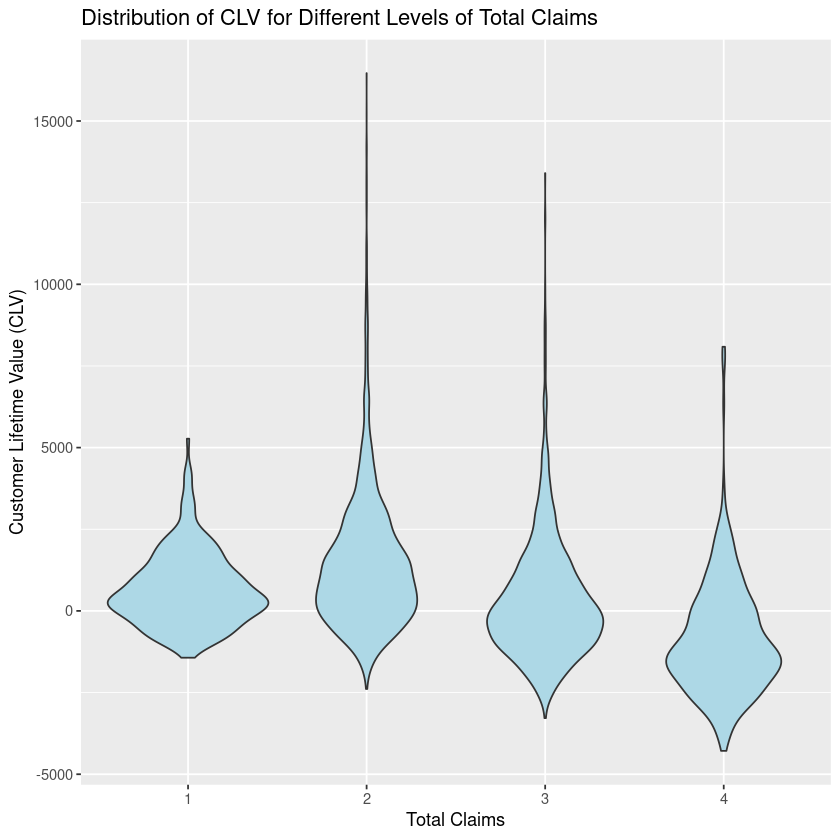

In [15]:
# Calculate correlation coefficient between total_claims and CLV
correlation <- cor(claims_df$total_claims, claims_df$customer_lifetime_value)

# View the correlation coefficient
print("Correlation Coefficient between Total Claims and CLV:")
print(correlation)

# Plotting violin plot of CLV for different levels of total claims
ggplot(claims_df, aes(x = factor(total_claims), y = customer_lifetime_value)) +
  geom_violin(fill = "lightblue") +
  labs(title = "Distribution of CLV for Different Levels of Total Claims",
       x = "Total Claims",
       y = "Customer Lifetime Value (CLV)")



# Executive Summary (20 Points)

Write an executive summary of your overall findings and recommendations to the executives at this company. Think of this section as your closing remarks of a presentation, where you summarize your key findings and make recommendations to improve pricing, company operations, and car insurance policy adjustments.

Your executive summary must be written in a [professional tone](https://www.universalclass.com/articles/writing/business-writing/appropriate-tone-in-business-communications.htm), with minimal grammatical errors, and should include the following sections:

1.  An introduction where you explain the business problem and goals of your data analysis

- What problem(s) is this company trying to solve? Why are they important to their future success?
- What was the goal of your analysis? What questions were you trying to answer and why do they matter?

<br>

2.  Highlights and key findings from your Exploratory Data Analysis section

- What were the interesting findings from your analysis and **why are they important for the business**?
	- Note: **Do not list all your questions and answers from the exploratory analysis section**. You should summarize the findings and list them in order by their potential business impact 
- This section is meant to **establish the need for your recommendations** in the following section

<br>

3.  Your recommendations to the company

- Each recommendation must be supported by your data analysis results
- You must clearly explain **why** you are making each recommendation and which results from your data analysis support this recommendation
- You must also describe the potential business impact of your recommendation:
	- Why is this a good recommendation?
	- What benefits will the business achieve?

**Please add you executive summary in the text block below**.

## Introduction
The data analysis was commissioned by the executives of Automobile Insurance Company to address key challenges in pricing strategies, customer behavior analysis, and car insurance policy adjustments. The company aimed to enhance profitability, optimize customer segmentation, and refine policy offerings to adapt to evolving market dynamics.


## Key Findings
**Customer Segmentation**: Identified demographics and behaviors linked to higher CLV, including advanced education levels like Master's or Doctoral degrees and employment statuses like "Disabled" or "Retired."

**Policy Adjustments**: Varying claims frequencies across different policy types necessitate adjustments. "Personal" policies had the highest claims, indicating potential coverage or pricing adjustments, while "Corporate" policies had fewer claims, suggesting opportunities for refined pricing strategies.

**Impact of Active Policy Duration**: Longer active policy durations correlated with higher CLV, emphasizing the importance of fostering long-term customer relationships and implementing retention strategies.

**Vehicle Class Influence**: Luxury vehicle classes such as "Luxury Car" and "Luxury SUV" had substantially higher CLV compared to standard vehicle classes like "Four-Door Car" or "Two-Door Car.

**Monthly Premium Analysis**: High CLV customers tended to have higher monthly premium amounts compared to negative CLV customers. This suggests that while high CLV customers may pay higher premiums, they also contribute more value to the company over their lifetime as customers.

## Recommendations
**Targeted Marketing:** Tailor campaigns to demographics with higher CLV, like females, Master's degree holders, singles, and disabled individuals.

**Policy Adjustments:** Review coverage and pricing for high claims policies like "Personal." Adjust offerings based on customer needs and explore incentives for low claims policies like "Corporate."

**Customer Retention:** Invest in personalized communication and loyalty programs, especially for long-term policyholders.

**Vehicle Class-Based Pricing:** Offer tailored packages or discounts for high CLV vehicle owners like Sports Cars and Luxury SUVs.

**Continuous Monitoring:** Regularly analyze CLV, claims frequency, and demographics to refine strategies and offerings.

Implementing these measures will optimize profitability and enhance customer satisfaction.


